<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Logistic_Regression_%26_Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Support Vector Machine (SVM)


---

**Dataset:** [Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

*   Train an SVM classifier on your dataset and evaluate its accuracy.
*   Try using different kernels (linear, rbf, poly) and compare their performance.

*   Use GridSearchCV to find the best hyperparameters for SVM.






**EDA**

In [ ]:
! kaggle datasets download zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 51% 35.0M/68.8M [00:00<00:00, 193MB/s] 
100% 68.8M/68.8M [00:00<00:00, 232MB/s]


In [ ]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data=pd.read_csv("fashion-mnist_train.csv")
test_data=pd.read_csv("fashion-mnist_test.csv")

In [ ]:
train_data.shape

(60000, 785)

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data['label'].describe()

,label
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [ ]:
X_train=train_data.drop('label',axis=1)
y_train=train_data['label']
X_test=test_data.drop('label',axis=1)
y_test=test_data['label']

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train,_,y_train,_=train_test_split(X_train_pca,y_train,test_size=0.7,random_state=42)
X_test,_,y_test,_=train_test_split(X_test_pca,y_test,test_size=0.7,random_state=42)

In [ ]:
X_train.shape

(18000, 100)

In [ ]:
y_train.shape

(18000,)

In [ ]:
kernels=['linear','rbf','poly']
results={}
for kernel in kernels:
  print(f"Training SVM with {kernel}")
  model=SVC(kernel=kernel)
  model.fit(X_train,y_train)

  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  results[kernel]=accuracy
  print(f"{kernel}Kernel Accuracy:{accuracy:.4f}")


Training SVM with linear
linearKernel Accuracy:0.8543
Training SVM with rbf
rbfKernel Accuracy:0.8757
Training SVM with poly
polyKernel Accuracy:0.8627


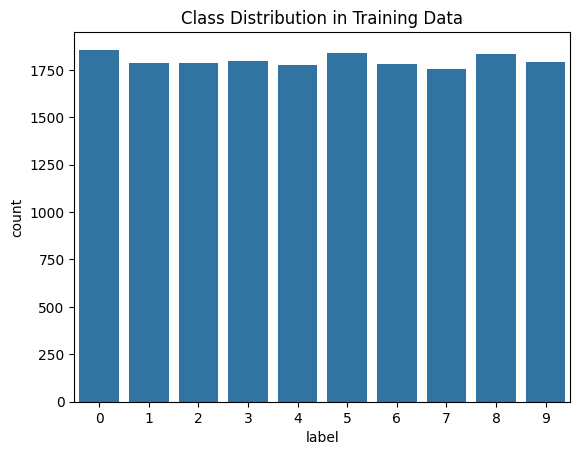

In [ ]:
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data")
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3, 4]  # Only for poly kernel
}

In [ ]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

In [ ]:
print("\nBest Parameters:", best_model)
print(f"Best Model Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: SVC(C=10, degree=2)
Best Model Accuracy: 0.8843

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       313
           1       0.99      0.99      0.99       316
           2       0.82      0.80      0.81       302
           3       0.90      0.90      0.90       302
           4       0.82      0.86      0.84       284
           5       0.95      0.94      0.94       310
           6       0.72      0.67      0.70       298
           7       0.91      0.94      0.92       288
           8       0.94      0.96      0.95       281
           9       0.95      0.94      0.95       306

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



# Part 2: Random Forest & Tree Depth Analysis

---
**Dataset:** [Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

*   Train a Random Forest classifier with n_estimators=100.
*   Identify the most important features using .feature_importances_.
*   Compare its accuracy with a single Decision Tree model.
*   Experiment with different max_depth values (3, 5, 10, None) in Decision Trees and analyze how it affects accuracy.
*   Compare Random Forest performance when setting max_features='sqrt' versus max_features='log2'.








In [ ]:
train_data=pd.read_csv("fashion-mnist_train.csv")
test_data=pd.read_csv("fashion-mnist_test.csv")

In [ ]:
X_train=train_data.drop('label',axis=1)
y_train=train_data['label']
X_test=test_data.drop('label',axis=1)
y_test=test_data['label']

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f"Accuracy of Random Forest:{accuracy_rf*100:.2f}%")

Accuracy of Random Forest:88.46%


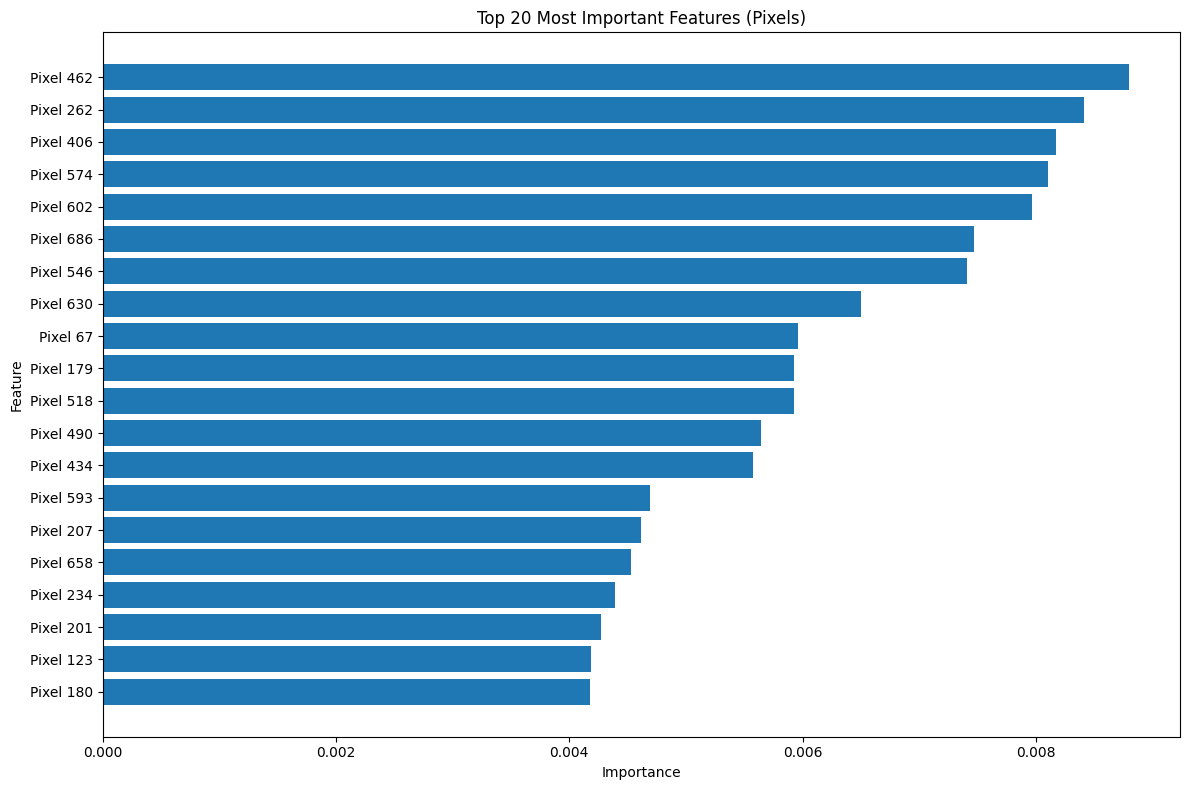

In [ ]:
feature_importances = rf_model.feature_importances_


top_indices = np.argsort(feature_importances)[-20:]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), top_importances)
plt.yticks(range(len(top_indices)), [f'Pixel {i}' for i in top_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features (Pixels)')
plt.tight_layout()
plt.show()

In [ ]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print(f"Accuracy of Decision Tree:{accuracy_dt*100:.2f}%")

Accuracy of Decision Tree:79.62%


In [ ]:
y_pred_train=dt_model.predict(X_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
print(f"Accuracy of Decision Tree on Training Data:{accuracy_train*100:.2f}%")

Accuracy of Decision Tree on Training Data:100.00%


In [ ]:
depths=[3,5,10,None]
results={}
for depth in depths:
  dt_model=DecisionTreeClassifier(max_depth=depth,random_state=42)
  dt_model.fit(X_train,y_train)
  y_pred=dt_model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  results[depth]=accuracy
  print(f"Accuracy of Decision Tree with max_depth={depth} : {accuracy*100:.2f}%")

Accuracy of Decision Tree with max_depth=3 : 49.90%
Accuracy of Decision Tree with max_depth=5 : 70.22%
Accuracy of Decision Tree with max_depth=10 : 80.82%
Accuracy of Decision Tree with max_depth=None : 79.62%


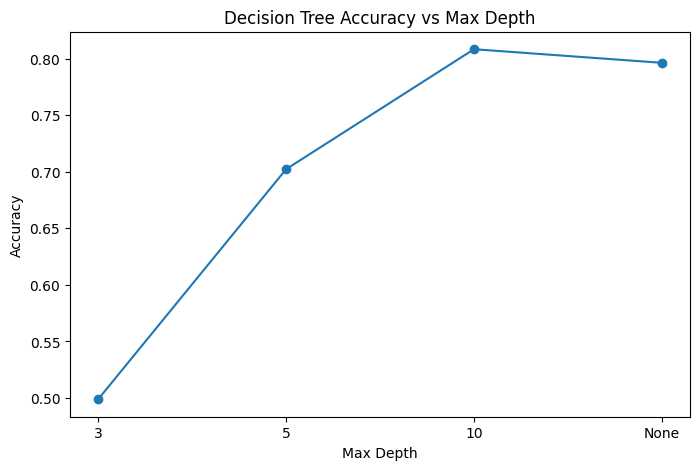

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in depths], results.values(), marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.show()

In [ ]:
rf_sqrt = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_sqrt.fit(X_train, y_train)
y_pred_sqrt = rf_sqrt.predict(X_test)
rf_sqrt_acc = accuracy_score(y_test, y_pred_sqrt)

rf_log2 = RandomForestClassifier(n_estimators=100, max_features='log2', random_state=42)
rf_log2.fit(X_train, y_train)
y_pred_log2 = rf_log2.predict(X_test)
rf_log2_acc = accuracy_score(y_test, y_pred_log2)

In [ ]:
print(f"Accuracy of Random Forest with max_features='sqrt': {rf_sqrt_acc*100:.2f}%")
print(f"Accuracy of Random Forest with max_features='log2': {rf_log2_acc*100:.2f}%")

Accuracy of Random Forest with max_features='sqrt': 88.46%
Accuracy of Random Forest with max_features='log2': 87.80%


#Part 3: Ensemble Methods (Bagging & Boosting)

---
**Dataset:** [Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

*   Train an AdaBoost classifier using a Decision Tree as a base model.
*   Train a Gradient Boosting classifier and compare its accuracy with AdaBoost.
*   Train a BaggingClassifier with Decision Trees and compare results with Boosting models.
*   Combine all three models (AdaBoost, Gradient Boosting, and Bagging) into a Voting Classifier to evaluate if an ensemble of ensembles performs better.




In [ ]:
train_data=pd.read_csv("fashion-mnist_train.csv")
test_data=pd.read_csv("fashion-mnist_test.csv")

In [ ]:
X_train=train_data.drop('label',axis=1)
y_train=train_data['label']
X_test=test_data.drop('label',axis=1)
y_test=test_data['label']

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
dt_model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier

In [ ]:
adaboost=AdaBoostClassifier(estimator=dt_model,n_estimators=50,random_state=42)
adaboost.fit(X_train,y_train)
y_pred_ada=adaboost.predict(X_test)
accuracy_ada=accuracy_score(y_test,y_pred_ada)
print(f"Accuracy of AdaBoost: {accuracy_ada*100:.2f}%")

Accuracy of AdaBoost: 72.10%


In [ ]:
gb=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=42,max_depth=3,verbose=1)
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
accuracy_gb=accuracy_score(y_test,gb_pred)
print(f"Accuracy of Gradient Boosting: {accuracy_gb*100:.2f}%")

      Iter       Train Loss   Remaining Time 
         1           1.8530           37.68m
         2           1.6138           36.92m
         3           1.4392           36.15m
         4           1.2980           35.38m
         5           1.1890           34.61m
         6           1.0995           33.84m
         7           1.0195           33.07m


In [ ]:
bg=BaggingClassifier(estimator=dt_model,n_estimators=50,random_state=42)
bg.fit(X_train,y_train)
bg_pred=bg.predict(X_test)
accuracy_bg=accuracy_score(y_test,bg_pred)
print(f"Accuracy of Bagging: {accuracy_bg*100:.2f}%")

In [ ]:
voting = VotingClassifier(estimators=[('ada', adaboost), ('gb', gb), ('bag', bg)], voting='hard')
voting.fit(X_train, y_train)
voting_preds = voting.predict(X_test)
voting_acc = accuracy_score(y_test, voting_preds)
print(f"Voting Classifier Accuracy: {voting_acc*100:.2f}%")



---
# Questions:
**Q1.**	Which kernel (linear, rbf, poly) performs best in SVM, and why?

**Soln:**The RBF kernel 87.57% accuracy performed the best among the standard kernels. This is because Fashion-MNIST data is complex and non-linearly separable, meaning a simple linear boundary is not sufficient.RBF kernel mapsdata into an infinite-dimensional space, allowing it to capture complex patterns.


*Note:* The polynomial kernel 86.27% accuracy can capture non-linearity, but it introduces bias based on the chosen degree, which might not fit all data variations well.In contrast, RBF automatically adjusts its flexibility through the gamma parameter, leading to a more robust model.



---


**Q2.**	How does increasing the number of estimators in AdaBoost affect accuracy?

**Soln:**


In [ ]:
n_estimators_list = [50, 100, 150, 200]
ada_accuracies = []

for n in n_estimators_list:
    adaboost = AdaBoostClassifier(estimator=dt_model, n_estimators=n, random_state=42)
    adaboost.fit(X_train, y_train)
    ada_preds = adaboost.predict(X_test)
    ada_acc = accuracy_score(y_test, ada_preds)
    ada_accuracies.append(ada_acc)
    print(f"AdaBoost Accuracy with {n} estimators: {ada_acc:.4f}")

In [ ]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, ada_accuracies, marker='o', linestyle='-', color='b', label='AdaBoost Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.legend()
plt.grid()
plt.show()

Increasing n_estimators in AdaBoost initially improves accuracy, but too many estimators can lead to overfitting, causing accuracy to drop. In this case, accuracy was highest at 50 estimators and declined before slightly recovering at 200 estimators.




---

**Q3.**	What is the effect of increasing the depth of a Decision Tree? When does it lead to overfitting?

**Soln:**

*   Increasing the depth of a Decision Tree initially improves accuracy by capturing more complex patterns, as seen in the rise from 49.90% (depth=3) to 80.82% (depth=10).


*   When the tree becomes too deep (max_depth=None), accuracy slightly drops to 79.62%, indicating overfitting.

---

**Q4.**	How does setting max_features='sqrt' versus max_features='log2' impact Random Forest performance?

**Soln:**

*   Using max_features='sqrt' selects square root of (total features) for each split,introducing more randomness and reducing correlation between trees, leading to slightly better accuracy (88.46%) due to improved generalization.
*   Using max_features='log2' selects log of (total features), restricting feature choices more than sqrt, which can limit diversity in splits, resulting in slightly lower accuracy (87.80%).


---

**Q5.** How do bagging and boosting differ? What are the benefits of ensemble methods?

**Soln:** Bagging (e.g., Random Forest) trains models independently in parallel to reduce variance, while Boosting (e.g., AdaBoost, Gradient Boosting) trains models sequentially to correct errors, improving accuracy but increasing overfitting risk.They improve accuracy, reduce overfitting, and enhance generalization by combining multiple models, with Random Forest proving most effective in this case.

---

**Q5.** Does combining all models (AdaBoost + Gradient Boosting + Bagging) in a Voting Classifier improve accuracy?

**Soln:** Combining Models in a Voting Classifier does not always guarantee improved accuracy, as seen here, where the Voting Classifier (78.09%) performs worse than Random Forest (88.46%) and Gradient Boosting (86.08%).Voting Classifiers often use majority voting, the influence of weaker models like Bagging could dilute its effect, leading to suboptimal performance.






